# 🔴 Mini-Project: Data Analysis
- Understanding enrollment trends of online-courses offered by university. 
- Extracting important insights from the dataset.
- identifying what contributes to higher enrollment.
- Determining if the course type (online or classroom) is a significant factor
- Key Concepts: Statistics, Data cleaning, transformations and visualizations.#### Submitted by: Malaika Ahmed 


In [ ]:
## Importing libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing Data Set

In [2]:
df=pd.read_csv("university_enrollment_(Mini-project-01).csv")

In [3]:
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,NaN,Technology
1847,1848,online,2011,257,76,81.0,NaN,Mathematics
1848,1849,online,2013,256,20.67,66.0,NaN,Math


## 🟡 STEP 01- Data Cleaning and Preprocessing

- Identifying duplicated rows
- Identifying Nulll Values
- Replacing null values with specific value
- Interpolating values in specific column
    
 

###     🔹 Identifying duplicated rows


In [5]:
df.duplicated().sum()

0

###     🔹 Identifying Nulll Values


In [4]:
df.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

### 🔎 Insights: 
- We have two columns in which null values are present i.e post_score nd pre_requirement.
- Since  both have large number of null values,dropping them is not a good option.
- Filling pre_requirement null values with string "None"
- Interpolating post_score nulll values


### 🔹 Replacing null values of pre_requirement with string "None"

In [7]:
df['pre_requirement'].fillna(value='None',inplace=True)

In [10]:
# Checking wether null values has been replaced by 'None' 

In [8]:
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


### 🔹 Interpolating post_score Nulll Values


In [11]:
df1=df['post_score']
df1.interpolate(inplace=True)

In [12]:
df1

0       73.0
1       86.0
2       80.0
3       75.0
4       76.0
        ... 
1845    81.0
1846    85.0
1847    81.0
1848    66.0
1849    72.0
Name: post_score, Length: 1850, dtype: float64

In [13]:
# Re-checking whether there's still any null value left in data set

In [14]:
df.isnull().sum()

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

## 🟡 STEP 02: Summary Statistics
- Drawing major insights from each column

### 🔹 Exploring column "course_type"


In [15]:
df['course_type'].value_counts()

course_type
online       1375
classroom     475
Name: count, dtype: int64

In [48]:
df['course_type'].value_counts().sum()

1850

### 🔎 Insights: 
- Out of 1850 Courses,1375 courses are offered online and 475 courses are offered in-person by university

### 🔹 Exploring column "year"


In [16]:
df['year'].value_counts()

year
2013    169
2012    164
2016    162
2015    160
2021    159
2018    156
2014    152
2022    150
2011    148
2019    147
2017    143
2020    140
Name: count, dtype: int64

### 🔎 Insights: 
- Shows the total number of courses offered in each year

In [17]:
df['year'].max()

2022

In [ ]:
df['year'].min()

### 🔎 Insights: 
- Courses are offered by university from year 2011 to year 2022

In [18]:
df['year'].value_counts().max()

169

In [19]:
df['year'].value_counts().min()

140

### 🔎 Insights: 
- Maximum number of courses offered by univeristy in a single year is 169.
- Minimum number of courses offered by university in a single year is 140.


### 🔹 Exploring column "enrollment_count"


In [79]:
df['enrollment_count'].sum()

428396

In [22]:
df['enrollment_count'].max()

267

In [23]:
df['enrollment_count'].min()

154

### 🔎 Insights: 
- Total number of students that got enrolled in all courses from year 2011 to 2022 is 428396
- Maximum number of students enrollment is 267 in a year
- Minimum number of students enrollment is 154 is a year


### 🔹 Exploring column "pre_score"


In [24]:
# Pre-Score column is stored in string,converting it into 'Numeric'


In [25]:
df['pre_score'] = pd.to_numeric(df['pre_score'], errors='coerce')


In [26]:
df['pre_score'].max()

100.0

In [27]:
df['pre_score'].min()

1.02

In [28]:
df['pre_score'].mean()

49.52731976744185

In [29]:
df['pre_score'].mode()

0    12.11
1    18.01
2    23.66
3    27.44
4    35.37
5    50.72
6    51.95
7    64.62
8    85.69
Name: pre_score, dtype: float64

### 🔎 Insights: 
- Highest pre-score (before taking courses) is 100
- Lowest pre-score is 1.02
- Mean score of all students before taking courses is around 49.5
- Mode shows most students scored this,before taking courses 

### 🔹 Exploring column "post_score"


In [30]:
df['post_score'].max()

105.0

In [31]:
df['post_score'].min()

51.0

In [32]:
df['post_score'].mean()

75.16864864864864

In [33]:
df['post_score'].mode()

0    76.0
Name: post_score, dtype: float64

### 🔎 Insights: 
- Highest post-score (before taking courses) is 105
- Lowest post-score is 51
- Mean score of all students after taking courses is around 75.1
- Mode shows most students scored 76 after taking courses 

### COMPARISON OF PRE-SCORE AND POST-SCORE STATISTICS
- After taking courses mean score of students increased from 49.5 to 75.1
- Lowest score before taking courses was 1.02 and after taking courses was 51.
- Both these results suggests that students performace got far better after taking courses

### 🔹 Exploring column "pre_requirement"


In [34]:
df['pre_requirement'].value_counts()

pre_requirement
None            891
Beginner        654
Intermediate    305
Name: count, dtype: int64

### 🔎 Insights: 
- 891 courses had 'No prior' requirement
- 654 courses had 'Beginner' level requirement
- 305 courses had 'Intermediate' level requirement

### 🔹 Exploring column "department"


In [35]:
df['department'].value_counts()

department
Technology     719
Science        472
Mathematics    220
Math           220
Engineering    219
Name: count, dtype: int64

### 🔎 Insights: 
- 719 courses were offered by 'Technology' Department
- 471 courses were offered by 'Science' Department
- 220 courses were offered by 'Mathmetics' Departmnet
- 219 courses were offered by 'Engineering' Department

## 🟡 STEP 03: Drawing Insights from Multiple Columns
- Understanding the distribution and relationships between columns

### 🔹 Finding insights from columns "enrollment_count" and "course_type"


In [81]:
 df.groupby('course_type')['enrollment_count'].sum()

course_type
classroom     80954
online       347442
Name: enrollment_count, dtype: int64

### 🔎 Insights: 
- More number of students got enrolled in online courses (347442) than classroom courses (80954)

### 🔹 Finding insights from columns "post_score" and "course_type"


In [38]:
df[['post_score','course_type']].max()

post_score      105.0
course_type    online
dtype: object

In [39]:
df[['post_score','course_type']].min()

post_score          51.0
course_type    classroom
dtype: object

### 🔎 Insights: 
- The student who got highest post-score i.e 105 took online course
- The student who got lowest post-score i.e 51 took in-person course

### 🔹 Finding insights from columns "pre_requirement" and "course_type"


In [49]:
df['course_type'].value_counts()

course_type
online       1375
classroom     475
Name: count, dtype: int64

In [40]:
df.groupby('course_type')['pre_requirement'].value_counts()

course_type  pre_requirement
classroom    Beginner           192
             Intermediate       171
             None               112
online       None               779
             Beginner           462
             Intermediate       134
Name: count, dtype: int64

### 🔎 Insights: 
Out of 1375 online courses :
  - 462 had Pre-Requirement of "Beginner" level
  - 134 had Pre-Requirement of "Intermediate" level
  - 779 had 'No' Pre-Requirement

Out of 475 classroom courses :
  - 192 had Pre-Requirement of "Beginner" level
  - 171 had Pre-Requirement of "Inermediate" level
  - 112 had 'No' Pre-Requirement
  
### 🔎 Comparison of Online and Classroom courses in terms of Pre-Requirement
   - Majority of online courses (779 out of 1375) have no pre-requirements, which makes them accessible.
   - Most classroom courses (192 out of 475) require a beginner level.


### 🔹 Finding insights from columns "department" and "course_type"


In [52]:
df['course_type'].value_counts()

course_type
online       1375
classroom     475
Name: count, dtype: int64

In [41]:
df.groupby('course_type')['department'].value_counts()
# max inperson by sc and min by maths
# max online by tech and min by eng

course_type  department 
classroom    Science        178
             Engineering    125
             Technology      82
             Mathematics     48
             Math            42
online       Technology     637
             Science        294
             Math           178
             Mathematics    172
             Engineering     94
Name: count, dtype: int64

### 🔎 Insights: 
- Majority of (178 out of 475) Classroom courses are offered by 'Science department'
- Majority of (637 out of 1375) Online courses are offered by 'Technology department'
- Least (42 out of 475) Classroom courses are offered by 'Math department'
- Least (94 out of 1375) Online courses are offered by 'Engineering department'

## FINDING WHAT CONTRIBUTES TO HIGHER ENROLLMENT?


### 🔹 Finding the impact of "course_type" on "enrollment_count"


In [54]:

dff = df.groupby(['enrollment_count', 'course_type']).size().reset_index(name='count')


In [55]:
dff = dff.sort_values(by='enrollment_count', ascending=False)
dff.head(20)


,enrollment_count,course_type,count
44,267,online,3
43,266,online,27
42,262,online,1
41,261,online,444
40,258,online,3
39,257,online,43
38,256,online,169
37,255,online,16
36,252,online,10
35,251,online,276


### 🔎 Results: 
- Top 20 Highest enrollments happened when university offered 'ONLINE COURSES'
- We can safely sum up that 'ONLINE COURSES' play and important role in having high enrollments

### 🔹 Finding the impact of "department" on "enrollment_count"


In [93]:
df.groupby('department')['enrollment_count'].sum()


department
Engineering     46065
Math            51865
Mathematics     51296
Science        100572
Technology     178598
Name: enrollment_count, dtype: int64

In [95]:
df.groupby('department')['enrollment_count'].sum().max()


178598

### 🔎 Results: 
- Highest number of enrollments happened when 'ONLINE COURSES' are offered by 'Technology Deparmtnet'
- We can safely say that when technology department offers online courses, Students turned out is highest.

### 🔹 Finding the impact of "pre_requirement" on "enrollment_count"


In [94]:
df.groupby('pre_requirement')['enrollment_count'].sum()


pre_requirement
Beginner        147283
Intermediate     59483
None            221630
Name: enrollment_count, dtype: int64

In [96]:
df.groupby('pre_requirement')['enrollment_count'].sum().max()

221630

### 🔎 Results: 
- Highest number of students got enroll when there's no prior course requirement.
- We can safely sum up that when there's no prior requirements for online courses, Students turned out is highest.

## 🟡 STEP 04: Visualizing the Major Results


#### 🔹 Visualizing the impact of "course_type" on "enrollment_count"
Since we have to compare categorical and numerical data, Bar plot would be most suitable.

In [80]:
total_enrollments = df.groupby('course_type')['enrollment_count'].sum()
total_enrollments

course_type
classroom     80954
online       347442
Name: enrollment_count, dtype: int64

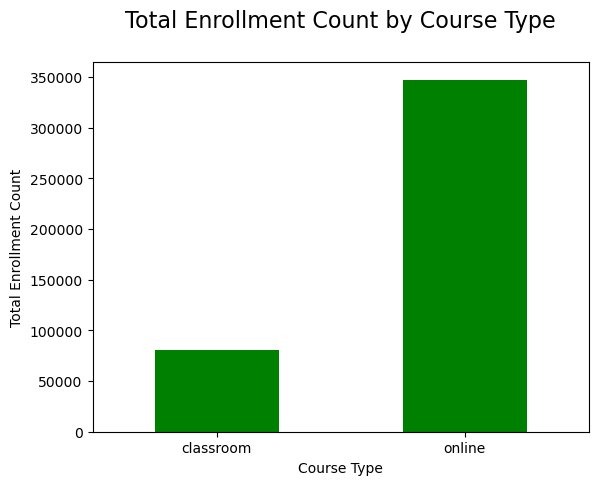

In [88]:

total_enrollments.plot(kind='bar', color='green')
plt.xlabel('Course Type')
plt.ylabel('Total Enrollment Count')
plt.title('Total Enrollment Count by Course Type',fontsize=16,pad=25)
plt.xticks(rotation=0)

plt.show()

### 🔹 Visualizing the impact of "department" on "enrollment_count"
Agian, we have to compare categorical and numerical data, so using bar chart is more approproate

In [92]:
df.groupby('department')['enrollment_count'].sum()


department
Engineering     46065
Math            51865
Mathematics     51296
Science        100572
Technology     178598
Name: enrollment_count, dtype: int64

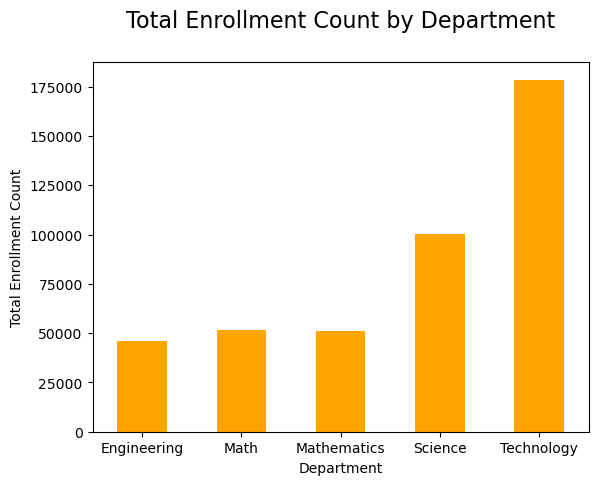

In [91]:
total_enrollments_by_department = df.groupby('department')['enrollment_count'].sum()

total_enrollments_by_department.plot(kind='bar', color='orange')
plt.xlabel('Department')
plt.ylabel('Total Enrollment Count')

plt.title('Total Enrollment Count by Department',fontsize=16,pad =25)
plt.xticks(rotation=0)

plt.show()


### 🔹 Visualizing the impact of "pre_requirement" on "enrollment_count"

In [98]:
total_enrollments_by_pre_req = df.groupby('pre_requirement')['enrollment_count'].sum()
total_enrollments_by_pre_req

pre_requirement
Beginner        147283
Intermediate     59483
None            221630
Name: enrollment_count, dtype: int64

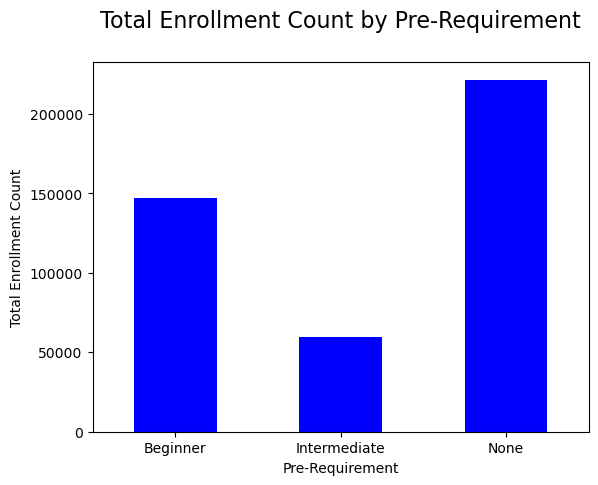

In [101]:

total_enrollments_by_pre_req.plot(kind='bar', color='blue')

plt.xlabel('Pre-Requirement')
plt.ylabel('Total Enrollment Count')

plt.title('Total Enrollment Count by Pre-Requirement',pad=25,fontsize=16)
plt.xticks(rotation=0)
plt.show()


# 🟡 SUMMARY POINTS - MAJOR INSIGHTS 
### COURSES
- Total: 1850 Courses:
   - Online: 1375
   - Classroom: 475
  
- Max courses in a year: 169
- Min courses in a year: 140
  
### YEAR
- Range: 2011 to 2022

### STUDENTS ENROLLMENT
- TOTAL: 428396
  -  Online: 347442
  - Classroom: 80954
  
- Max number of students enrolled in a year: 267
- Min number of students enrolled in a year: 154

### PRE-SCORE
- Highest: 100
- Lowest: 1.02
- Mean: 49.5

### POST-SCORE
- Highest: 105
- Lowest: 51
- Mean: 75.1

### PRIOR-REQUIREMENT
-  No Requirement: 891 courses
-  Beginner:  654 courses 
- Intermediate: 305 courses

### DEPARTMENT
- Technology: 719 courses 
- Science: 471 courses 
- Mathmetics: 220 courses
- Engineering: 219 courses 

### FURTHER POINTS
- Majority of (178 out of 475) Classroom courses are offered by 'Science department'
- Majority of (637 out of 1375) Online courses are offered by 'Technology department'
- Least (42 out of 475) Classroom courses are offered by 'Math department'
- Least (94 out of 1375) Online courses are offered by 'Engineering department'
- Top 20 Highest enrollments happened when university offered 'ONLINE COURSES'
- Highest number of enrollments happened when 'ONLINE COURSES' are offered by 'Technology Department'
- Highest number of students got enroll when there's no prior course requirement.
